In [144]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [145]:
df=pd.read_csv("loan_dataset.csv")

In [146]:
loan_status=[]
for i in range(len(df)):
    if df['age'][i]<60:
        if df['user_cibil'][i]>=500:
            if df['user_itr_based_income'][i]>=350000:
                if df['occupation'][i]!='Buisness':
                    loan_status.append("Approved")
                else:
                    if df['user_cibil'][i]>=750:
                        loan_status.append("Approved")
                    else:
                        loan_status.append("Not Approved")
            else:
                loan_status.append("Not Approved")            
        
        else:
            loan_status.append("Not Approved")
    else:
        loan_status.append('Not Approved')
df['status']=loan_status

In [147]:
df.columns

Index(['user_name', 'age', 'loan_need_amount', 'loan_term', 'user_cibil',
       'user_itr_based_income', 'loan_type', 'occupation', 'status'],
      dtype='object')

In [148]:
df.shape

(500, 9)

In [149]:
df.status.value_counts()

Not Approved    252
Approved        248
Name: status, dtype: int64

In [150]:
df.isnull().sum()

user_name                0
age                      0
loan_need_amount         0
loan_term                0
user_cibil               0
user_itr_based_income    0
loan_type                0
occupation               0
status                   0
dtype: int64

# Data Visualization

Text(0, 0.5, 'No of people of that age')

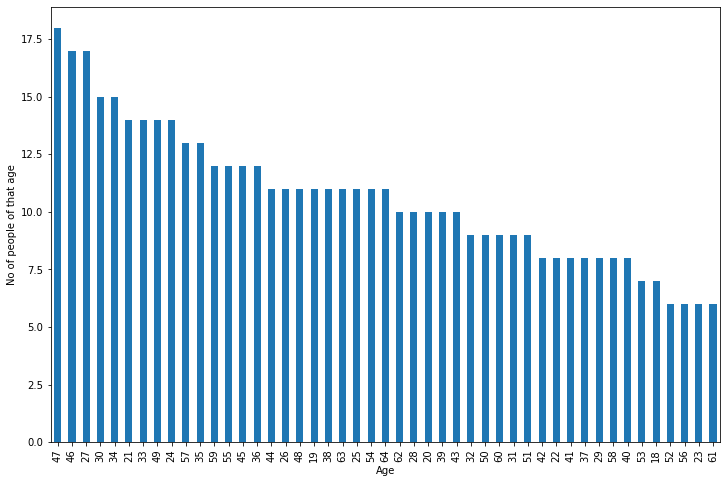

In [151]:
plt.figure(figsize=(12,8))
df.age.value_counts().plot.bar()
plt.xlabel("Age")
plt.ylabel("No of people of that age")

Text(0.5, 0, 'Age')

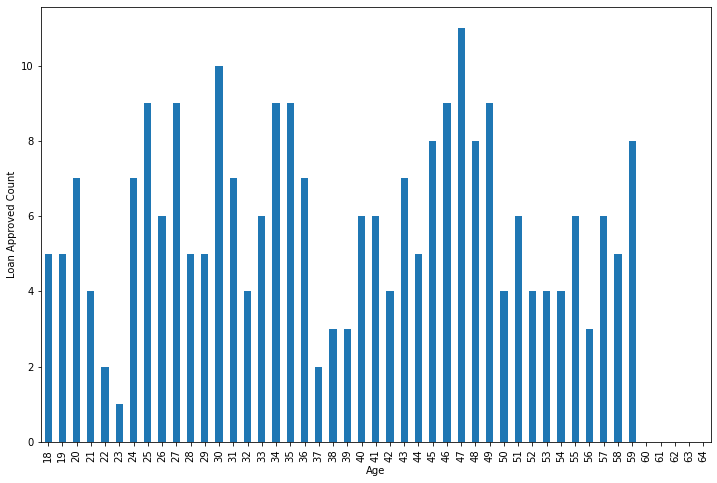

In [152]:
f=pd.crosstab(df['age'],df['status'],margins=True)
plt.figure(figsize=(12,8))
f.iloc[0:47,0].plot(kind='bar')
plt.ylabel("Loan Approved Count")
plt.xlabel("Age")
#From this bar graph you can see that people with age>59 were not approved for loan

Text(0, 0.5, 'No of people in Dataset')

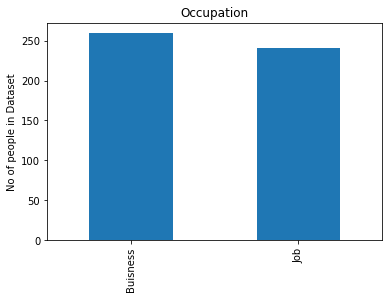

In [153]:
df.occupation.value_counts().plot.bar(title='Occupation')
plt.ylabel("No of people in Dataset")

Text(0, 0.5, 'No of people in Dataset')

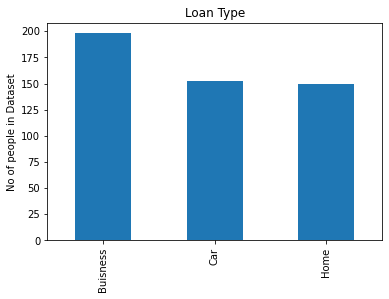

In [154]:
df.loan_type.value_counts().plot.bar(title='Loan Type')
plt.ylabel("No of people in Dataset")

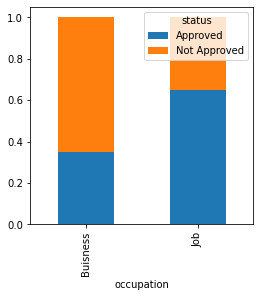

In [155]:
Occupation=pd.crosstab(df['occupation'],df['status'])
Occupation.div(Occupation.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
# From this we can see that the peolple with jobs will have higher chance og getting a loan than business men/women

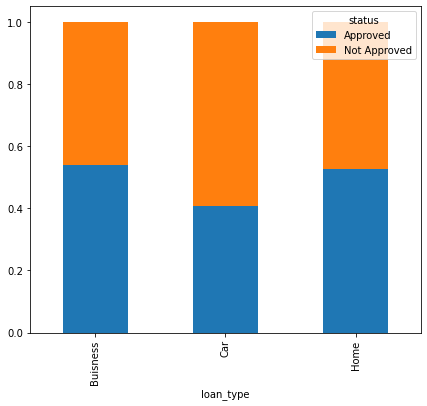

In [156]:
loan_type=pd.crosstab(df['loan_type'],df['status'])
loan_type.div(loan_type.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(7,6))
plt.show()

([<matplotlib.patches.Wedge at 0x21871731940>,
 [Text(0.32480944289406144, 1.4848901729780724, 'Business'),
  Text(-1.2378327978189745, -0.45844297861746136, 'Car'),
  Text(0.7123666153127913, -1.1112757557815243, 'Home')],
 [Text(0.19659518912008983, 0.8987493152235702, '43.1%'),
  Text(-0.6751815260830769, -0.25005980651861526, '25.0%'),
  Text(0.3885636083524316, -0.6061504122444676, '31.9%')])

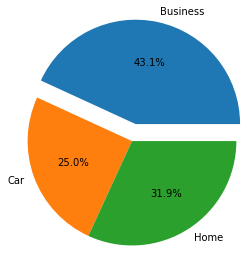

In [157]:
label=['Business','Car','Home']
myexplode=[0.2,0,0]
temp=df[df['status']=='Approved'].groupby("loan_type").status.count()
plt.pie(temp,labels=label,radius=1.2,explode=myexplode,autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x21871782550>,
 [Text(0.5358737656453687, 1.2063330001674715, 'Business'),
  Text(-0.5358737656453694, -1.2063330001674712, 'Job')],
 [Text(0.29229478126111014, 0.6579998182731662, '36.7%'),
  Text(-0.2922947812611105, -0.657999818273166, '63.3%')])

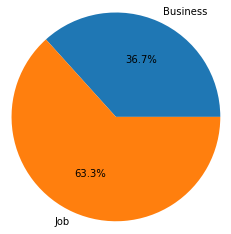

In [158]:
label=['Business','Job']
temp=df[df['status']=='Approved'].groupby("occupation").status.count()
plt.pie(temp,labels=label,radius=1.2,autopct="%1.1f%%")


# Label Encoding

In [159]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan_type_encoded=le.fit_transform(df['loan_type'])
occupation_encoded=le.fit_transform(df['occupation'])
status_encoded=le.fit_transform(df['status'])


In [160]:
df['loan_type']=loan_type_encoded
df['occupation']=occupation_encoded
df

,user_name,age,loan_need_amount,loan_term,user_cibil,user_itr_based_income,loan_type,occupation,status
0,Kenna Brennan,41,970000,1,613,9080000,0,1,Approved
1,Kayden Horne,47,300000,1,854,8340000,1,1,Approved
2,Ayaan Lamb,24,840000,1,653,450000,2,1,Approved
3,Jessie Powers,40,430000,12,888,730000,1,0,Approved
4,Austin Lane,46,470000,11,988,6560000,1,0,Approved
...,...,...,...,...,...,...,...,...,...
495,Elisha Santana,57,610000,18,392,9830000,2,0,Not Approved
496,Raquel Middleton,48,530000,6,548,3120000,2,1,Approved
497,Tyree King,63,190000,13,357,2080000,1,1,Not Approved
498,Addyson Barrett,41,660000,7,835,8500000,1,1,Approved


In [161]:
features=df.iloc[:,1:8]
label=df.status

In [171]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(features,label,test_size=0.2)
x_train

,age,loan_need_amount,loan_term,user_cibil,user_itr_based_income,loan_type,occupation
329,38,990000,19,487,7220000,1,1
114,20,960000,6,724,4610000,2,1
305,49,500000,12,324,5860000,1,1
495,57,610000,18,392,9830000,2,0
89,38,140000,13,428,1730000,2,1
...,...,...,...,...,...,...,...
272,30,980000,8,313,6770000,1,0
104,53,590000,17,887,1100000,1,0
487,21,650000,2,325,490000,1,0
202,25,350000,3,672,1180000,2,1


# Scaling The Data for Greater Accuracy By Standard Scalar Method

In [172]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [189]:
y_pred=knn.predict(x_test)

In [190]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 91.0


In [191]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

    Approved       0.88      0.94      0.91        49
Not Approved       0.94      0.88      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

Confusion Matrix: [[46  3]
 [ 6 45]]


In [192]:
error_rate = []
# Will take some time
for i in range(1,50):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

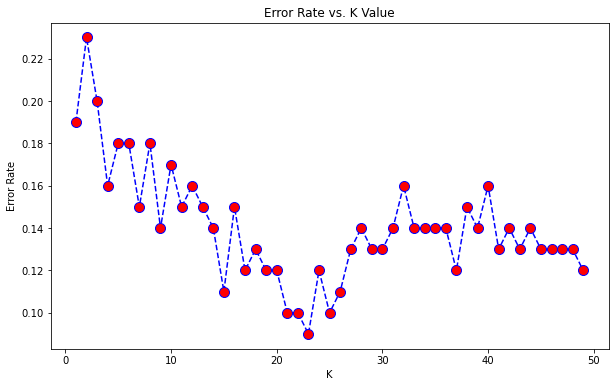

In [193]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [199]:
print("***ENTER YOUR DETAILS***")


age=int(input("Enter age:"))
loan_need_amount=int(input("Enter Loan Need Amount:"))
loan_term=int(input("Enter Loan Term:"))
user_cibil=int(input("Enter Cibil Score:"))
income=int(input("Enter Income:"))
loan_type=int(input("Enter Loan Type (0 for Buisness,1 for Car,2 for Home):"))
occupation=int(input("Enter Occupation (1 for Job,0 for Buisness):"))
test_data={'age':age,'loan_need_amount':loan_need_amount,'loan_term':loan_term,'user_cibil':user_cibil,'income':income,'loan_type':loan_type,'occupation':occupation}
df2=pd.DataFrame(test_data,index=[0])

pred_test =knn.predict(df2)
print("Your Loan status is:",pred_test[0])

***ENTER YOUR DETAILS***
Enter age:30
Enter Loan Need Amount:200000
Enter Loan Term:6
Enter Cibil Score:780
Enter Income:900000
Enter Loan Type (0 for Buisness,1 for Car,2 for Home):1
Enter Occupation (1 for Job,0 for Buisness):1
Your Loan status is: Approved
